# Imports

In [2]:
# imports
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
import cv2 as cv
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

2024-05-14 07:51:59.390721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 07:51:59.390824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 07:51:59.525117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Define Directories

In [3]:
# Define paths to data directories
train_dir = '/kaggle/input/hardata/Human Action Recognition/train'
test_dir = '/kaggle/input/hardata/Human Action Recognition/test'
training_set_csv = '/kaggle/input/hardata/Human Action Recognition/Training_set.csv'
testing_set_csv = '/kaggle/input/hardata/Human Action Recognition/Testing_set.csv'

In [4]:
#Dataframe classifying the actions
train_action = pd.read_csv(training_set_csv)
test_action = pd.read_csv(testing_set_csv)

# Data Visulaization

In [5]:
train_action.head()

filename         label
0  Image_1.jpg       sitting
1  Image_2.jpg  using_laptop
2  Image_3.jpg       hugging
3  Image_4.jpg      sleeping
4  Image_5.jpg  using_laptop

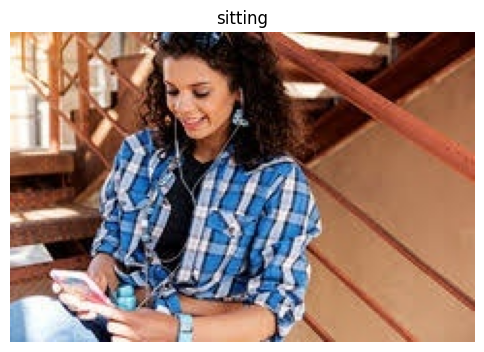

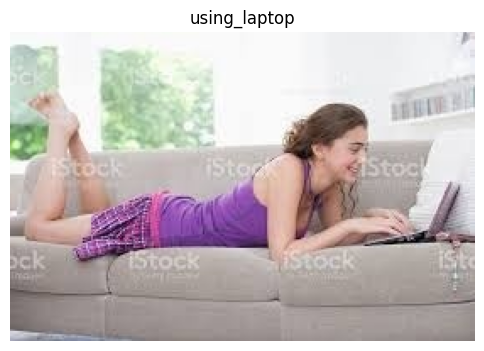

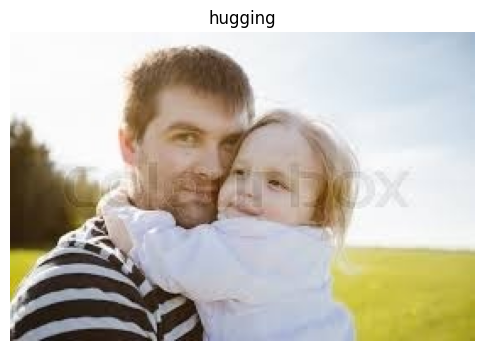

In [6]:
#Printing the images along with their respective action

for i in range(min(3, len(train_action))):
    # Read the image
    img = cv.imread(os.path.join(train_dir, train_action.filename[i]))

    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(train_action.label[i])
    plt.axis('off')
    plt.show()

In [7]:
test_action.shape

(5400, 1)

In [8]:
train_action.shape

(12600, 2)

In [9]:
#Sample images and their labels in the training data


def show_img_train():
    img_num = np.random.randint(0,12599)
    img = cv.imread(train_dir + '/' + train_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(train_action.label[img_num])

def show_img_test():
    img_num = np.random.randint(0,5399)
    img = cv.imread(test_dir +'/' + test_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

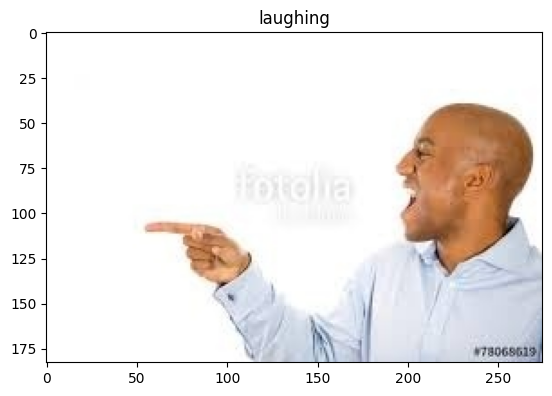

In [10]:
show_img_train()

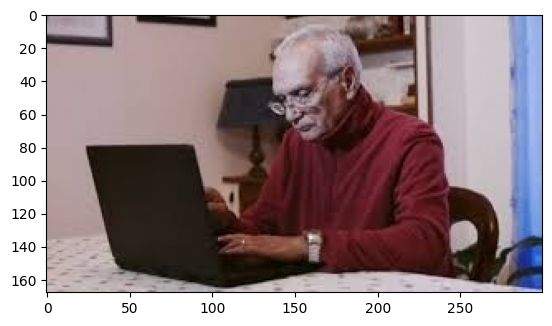

In [11]:
show_img_test()

In [12]:
l = train_action.label.value_counts()
fig = px.pie(train_action, values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()

In [13]:
train_action.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

(160, 240, 3)


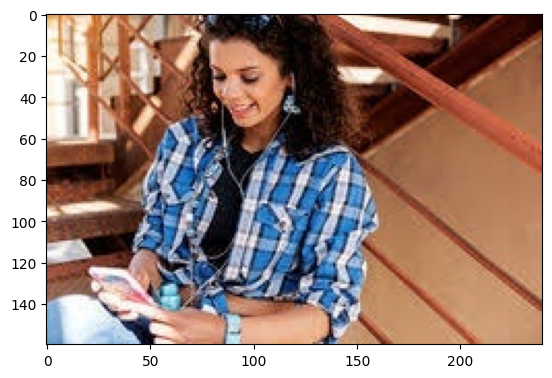

In [11]:
img = cv.imread(train_dir + '/' + train_action.filename[0])

#OpenCV reads the images in BGR instead of the standard RGB, hence the below line of code

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
print(img.shape)

# Preprocessing

In [12]:
import os

# Create the directory
parent_dir = "/kaggle/working"  # Typical working directory in Kaggle Notebooks
directory_name = "resized-train"
path = os.path.join(parent_dir, directory_name)

# Using makedirs to create the directory and set exist_ok=True to avoid error if the directory already exists
os.makedirs(path, exist_ok=True)

print(f'Created "{directory_name}" folder at: {path}')

Created "resized-train" folder at: /kaggle/working/resized-train


In [13]:
#dimensions
width = 224
height = 224
dim = (width, height)


resized_dir = "/kaggle/working/resized-train/"

#resizing all the images in the train folder
for i in np.arange(len(train_action.filename)):
    #read the filename from the dataframe
    filename = train_action.filename.iloc[i]
    #read the image from the train folder
    img = cv.imread(train_dir + '/' + filename)
    #resize the image
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    #write the image in resized folder
    cv.imwrite(resized_dir+ filename ,resized)

In [14]:
#create resized directory in the current project folder
parent_dir = "/kaggle/working"  # Parent directory in Google Colab
directory = 'resized-test'
path = os.path.join(parent_dir, directory)
os.makedirs(path, exist_ok=True)

print(f'Created "{directory}" folder at: {path}')

Created "resized-test" folder at: /kaggle/working/resized-test


In [15]:
resized_dir = "/kaggle/working/resized-test/"

#resizing all the images in the train folder
for i in np.arange(len(test_action.filename)):
    #read the filename from the dataframe
    filename = test_action.filename.iloc[i]
    #read the image from the train folder
    img = cv.imread(test_dir + '/' + filename)
    #resize the image
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    #write the image in resized folder
    cv.imwrite(resized_dir + filename ,resized)

(224, 224, 3)


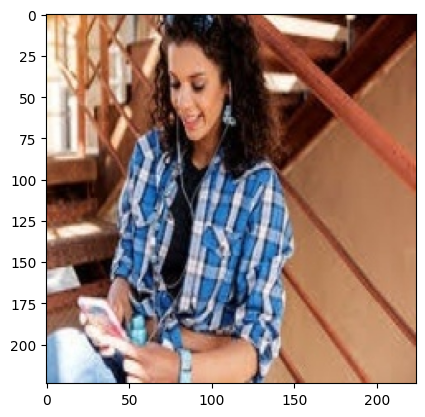

In [16]:
img = cv.imread('resized-train/' + train_action.filename[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
print(img.shape)

In [17]:
#empty list train
X = []

#reading all the resized images
for i in np.arange(len(train_action.filename)):
    img = cv.imread('resized-train/' + train_action.filename[i])
    X.append(img)

X = np.asarray(X)
X.shape

(12600, 224, 224, 3)

In [18]:
y = np.asarray(pd.get_dummies(train_action.label))
print(y.shape)

(12600, 15)


In [23]:
y[2]

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False])

In [24]:
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42,stratify=train_action.label)

(12600, 224, 224, 3) (12600, 15)


In [25]:
print(X_train.shape,y_train.shape)

(11340, 224, 224, 3) (11340, 15)


In [26]:
#empty list test
X_unseen = []

#reading all the resized images
for i in np.arange(len(test_action.filename)):
    img = cv.imread('resized-test/' + test_action.filename[i])
    X_unseen.append(img)

X_unseen = np.asarray(X_unseen)
X_unseen.shape

(5400, 224, 224, 3)

In [33]:
y_train[3]

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False])

# Model 

In [27]:
def build_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model((224, 224, 3), 15)

In [34]:
#Sequential model constructor
cnn_model = Sequential()

#initializing a vgg16 wihtout the top layers 
pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

#Freezing the deeper layers
for layer in pretrained_model.layers:
        layer.trainable=False
        
#adding our layers to the model
cnn_model.add(pretrained_model)
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(15, activation='softmax'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,403,791 (169.39 MB)

 Trainable params: 44,403,791 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

# Initialize a Sequential model
cnn_model = Sequential()

# Adding an InputLayer to the Sequential model
cnn_model.add(InputLayer(shape=(224, 224, 3)))

# Initialize VGG16 without the top layers
pretrained_model = tf.keras.applications.VGG16(include_top=False,
                                               input_shape=(224, 224, 3),
                                               pooling='avg',
                                               weights='imagenet')

# Freezing the deeper layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Adding the pretrained VGG16 model to the Sequential model
cnn_model.add(pretrained_model)

# Adding the rest of the layers to the model
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(15, activation='softmax'))

# Compiling the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,985,039 (57.16 MB)

 Trainable params: 270,351 (1.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Training

In [33]:
# Define callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint(filepath='/kaggle/working/cnn_model_best.keras', monitor='val_loss', save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=20)

checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min')



# Fit the model with callbacks
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_test, y_test),)

Epoch 1/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0961 - loss: 2.6265 - val_accuracy: 0.0730 - val_loss: 5.2538
Epoch 2/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.1029 - loss: 2.6263 - val_accuracy: 0.0698 - val_loss: 5.5479
Epoch 3/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.1015 - loss: 2.6138 - val_accuracy: 0.0690 - val_loss: 5.1883
Epoch 4/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0961 - loss: 2.7030 - val_accuracy: 0.0730 - val_loss: 8.5359
Epoch 5/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0965 - loss: 2.6407 - val_accuracy: 0.0690 - val_loss: 5.3396
Epoch 6/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0965 - loss: 2.6223 - val_accuracy: 0.0690 - val_loss: 7.2512
Epoch 7/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.1045 - loss: 2.6221 - val_accuracy: 0.0738 - val_loss: 7.6598
Epoch 8/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0997 - loss: 2.6517 - 

In [41]:
# Define callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint(filepath='/kaggle/working/cnn_model_best.keras', monitor='val_loss', save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=20)

checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min')



# Fit the model with callbacks

history = cnn_model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/60


2024-05-14 08:08:35.182717: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-05-14 08:08:35.182778: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-05-14 08:08:35.182793: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-05-14 08:08:35.182813: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-05-14 08:08:35.182825: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-05-14 08:08:35.182849: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-05-14 08:08:35.182860: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-05-14 08:08:35.182870: E external/local_xla/xla/se

  3/355 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.0417 - loss: 21.8494  

I0000 00:00:1715674130.942710     133 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2914 - loss: 5.8942

2024-05-14 08:09:13.344228: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.37359, expected 2.7841
2024-05-14 08:09:13.344286: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.43935, expected 3.84986
2024-05-14 08:09:13.344296: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.60416, expected 4.01467
2024-05-14 08:09:13.344303: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.68174, expected 4.09225
2024-05-14 08:09:13.344311: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.80871, expected 4.21922
2024-05-14 08:09:13.344319: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.51692, expected 3.92744
2024-05-14 08:09:13.344326: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 4.75989, expected 4.1704
2024-05-14 08:09:13.344334: E external/local_xla/xla/serv

355/355 ━━━━━━━━━━━━━━━━━━━━ 53s 96ms/step - accuracy: 0.2917 - loss: 5.8797 - val_accuracy: 0.4429 - val_loss: 1.8244
Epoch 2/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.4980 - loss: 1.5790 - val_accuracy: 0.4635 - val_loss: 1.7376
Epoch 3/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.5660 - loss: 1.3340 - val_accuracy: 0.4881 - val_loss: 1.7212
Epoch 4/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.6147 - loss: 1.1763 - val_accuracy: 0.5000 - val_loss: 1.7347
Epoch 5/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.6894 - loss: 0.9580 - val_accuracy: 0.4984 - val_loss: 1.8177
Epoch 6/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.7015 - loss: 0.9025 - val_accuracy: 0.4960 - val_loss: 1.9251
Epoch 7/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.7292 - loss: 0.8373 - val_accuracy: 0.4921 - val_loss: 1.9945
Epoch 8/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7556 - loss: 0.7279 - val_accurac

In [42]:
#Saving the trained weights
model.save_weights('./cnn_model.weights.h5')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


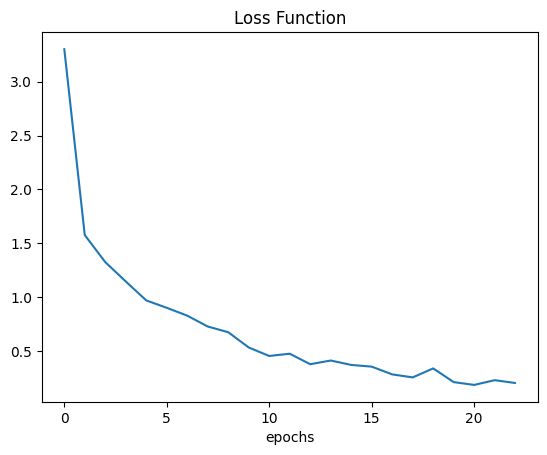

In [43]:
#plotting the loss
loss = history.history['loss']

plt.title("Loss Function")
plt.xlabel("epochs")
sns.set_theme(style='darkgrid')
sns.lineplot(loss);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


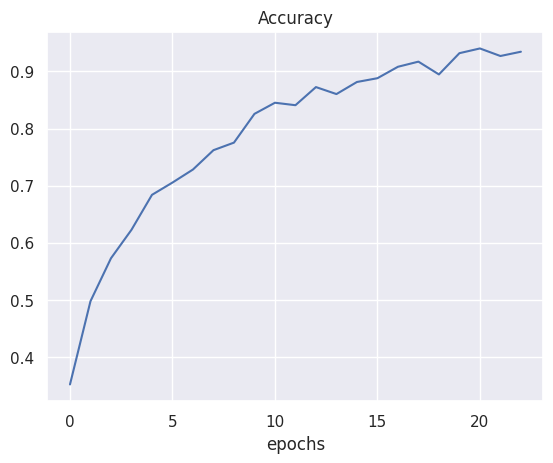

In [44]:
plt.title("Accuracy")
plt.xlabel("epochs")
accu = history.history['accuracy']
sns.lineplot(accu);

In [45]:
y_preds = model.predict(X_test)

2024-05-14 08:25:37.960336: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49284: 7.84353, expected 6.92193
2024-05-14 08:25:37.960397: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.76792, expected 6.84632
2024-05-14 08:25:37.960407: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 6.15631, expected 5.23472
2024-05-14 08:25:37.960415: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 6.71859, expected 5.797
2024-05-14 08:25:37.960423: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49289: 7.43913, expected 6.51753
2024-05-14 08:25:37.960432: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49290: 7.1783, expected 6.25671
2024-05-14 08:25:37.960440: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49291: 6.06838, expected 5.14679
2024-05-14 08:25:37.960448: E 

37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

2024-05-14 08:25:40.568753: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 58791: 3.2813, expected 2.84413
2024-05-14 08:25:40.568892: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 68770: 3.2813, expected 2.84413
2024-05-14 08:25:40.568979: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 78749: 3.2813, expected 2.84413
2024-05-14 08:25:40.569065: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 88728: 3.2813, expected 2.84413
2024-05-14 08:25:40.569914: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 246422: 8.68732, expected 7.70766
2024-05-14 08:25:40.569939: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 246423: 8.03116, expected 7.0515
2024-05-14 08:25:40.569947: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 246424: 7.67128, expected 6.69163
2024-05-14 08:25:40.569955: E

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


# Testing and Validation

In [38]:
y_preds = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [47]:
y_preds = cnn_model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


In [46]:
from sklearn.metrics import accuracy_score, log_loss

print('Log Loss:',log_loss(np.round(y_preds),y_test))
print('Accuracy:',accuracy_score(np.round(y_preds),y_test))

Log Loss: 33.41189457022924
Accuracy: 0.06428571428571428


In [48]:
from sklearn.metrics import accuracy_score, log_loss

print('Log Loss:',log_loss(np.round(y_preds),y_test))
print('Accuracy:',accuracy_score(np.round(y_preds),y_test))

Log Loss: 16.133825802747683
Accuracy: 0.49523809523809526


In [54]:
from PIL import Image
import matplotlib.image as mimg

#reading image and resize 
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((224,224)))

#predict the class and the confidence of the prediction
def test_predict(test_image):
    result = cnn_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = mimg.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

In [58]:
from PIL import Image
import matplotlib.image as mimg

#reading image and resize 
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((224,224)))

#predict the class and the confidence of the prediction
def test_predict(test_image):
    result = model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("\nPredicted class : ", prediction)

    image = mimg.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

2024-05-14 08:27:01.196478: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.14435, expected 3.59734
2024-05-14 08:27:01.196531: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148032: 3.73171, expected 3.1847
2024-05-14 08:27:01.196540: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148049: 4.2981, expected 3.75109
2024-05-14 08:27:01.196553: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149297: 4.2275, expected 3.68049
2024-05-14 08:27:01.196562: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 3.89754, expected 3.35053
2024-05-14 08:27:01.196570: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149444: 4.35104, expected 3.80403
2024-05-14 08:27:01.196578: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149482: 4.25819, expected 3.71118
2024-05-14 08:27:01.196

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Predicted class :  13


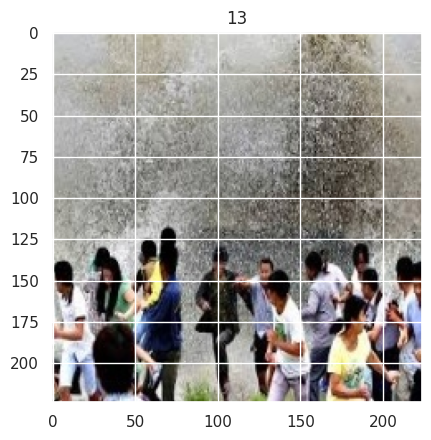

In [50]:
#Image 1
filename = test_action.filename.iloc[2]
test_predict('./resized-test/' + filename)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Predicted class :  9


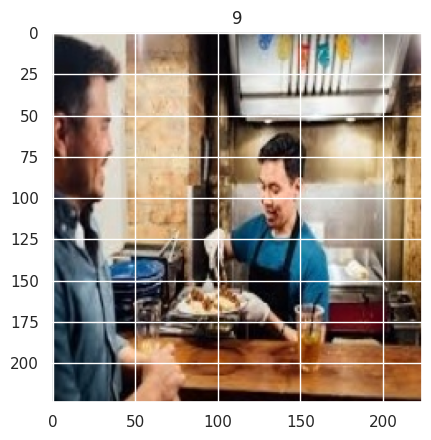

In [59]:
#Image 2
filename = test_action.filename.iloc[1]
test_predict('./resized-test/' + filename)

2024-05-14 08:29:03.982979: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.42855, expected 3.64542
2024-05-14 08:29:03.983043: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.87036, expected 5.08723
2024-05-14 08:29:03.983053: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.04003, expected 5.2569
2024-05-14 08:29:03.983062: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.22034, expected 5.43722
2024-05-14 08:29:03.983069: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.90026, expected 4.11714
2024-05-14 08:29:03.983077: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.21068, expected 4.42756
2024-05-14 08:29:03.983084: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.92061, expected 5.13748
2024-05-14 08:29:03.983092: E external/local_xla/xla/ser

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
probability: 100.0%
Predicted class :  5


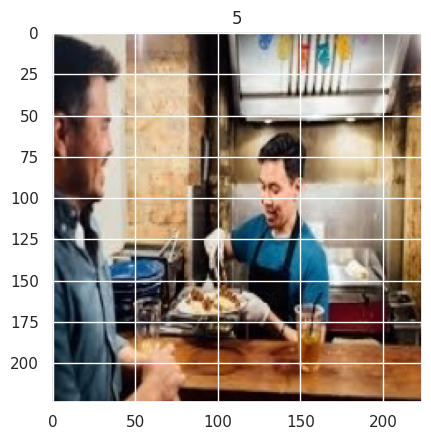

In [55]:
#Image 2
filename = test_action.filename.iloc[1]
test_predict('./resized-test/' + filename)

In [60]:
num_classes = cnn_model.layers[-1].units

In [31]:
print(f"The model is designed to predict {num_classes} classes.")

The model is designed to predict 15 classes.


Epoch 1/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.1056 - loss: 2.6989 - val_accuracy: 0.1968 - val_loss: 3.0468
Epoch 2/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.2192 - loss: 2.3995 - val_accuracy: 0.2730 - val_loss: 2.8255
Epoch 3/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3230 - loss: 2.1079 - val_accuracy: 0.2853 - val_loss: 3.8932
Epoch 4/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4499 - loss: 1.7184 - val_accuracy: 0.3036 - val_loss: 5.8735
Epoch 5/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5908 - loss: 1.2701 - val_accuracy: 0.2929 - val_loss: 9.6954
Epoch 6/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7110 - loss: 0.9042 - val_accuracy: 0.2829 - val_loss: 12.6209
Epoch 7/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7996 - loss: 0.6216 - val_accuracy: 0.2913 - val_loss: 17.7328
Epoch 8/60
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8535 - loss: 0.4592 - val_a

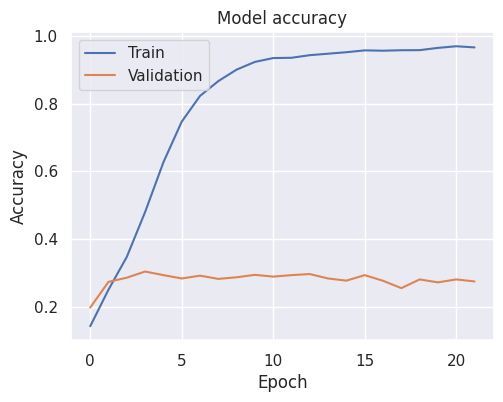

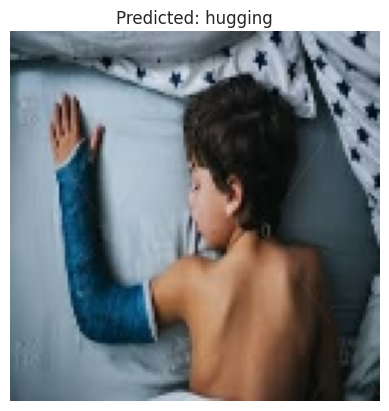

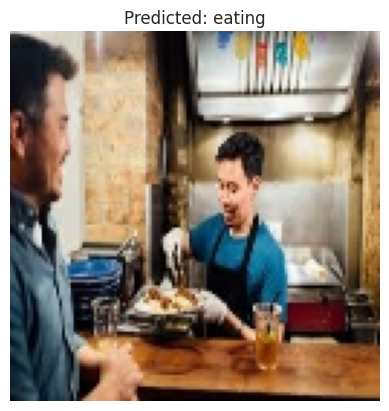

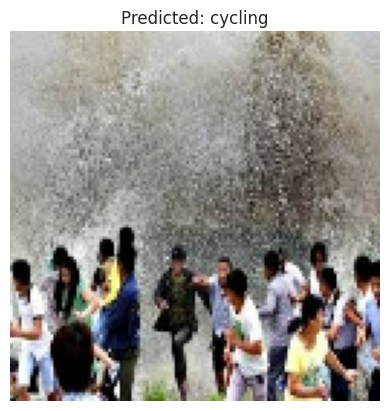

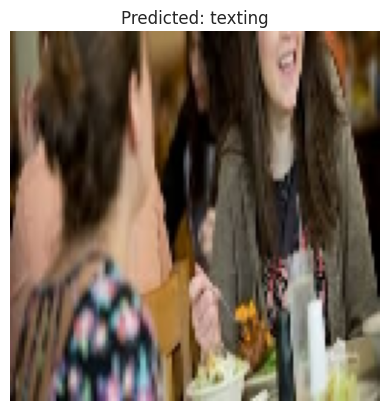

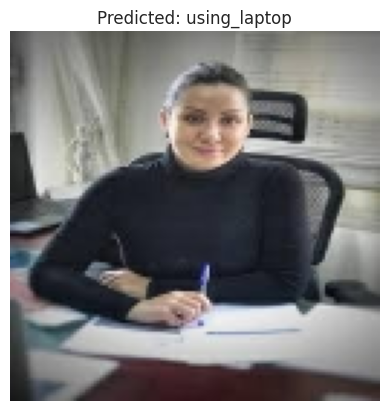

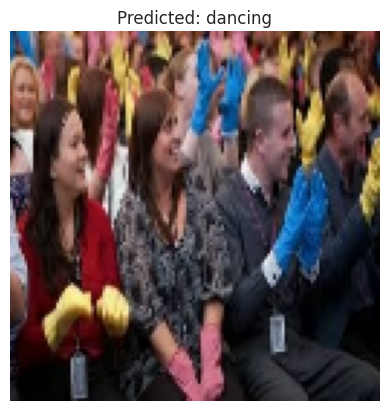

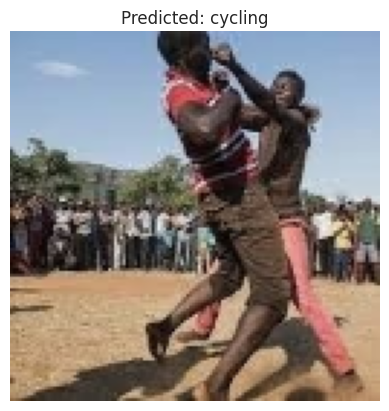

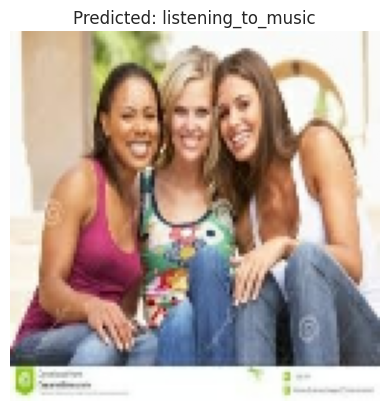

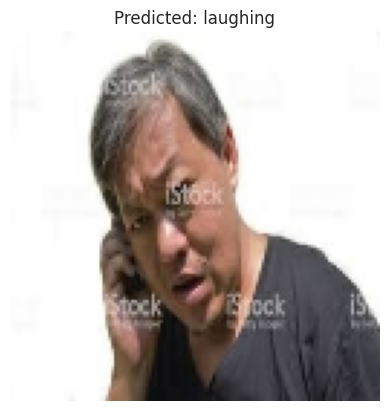

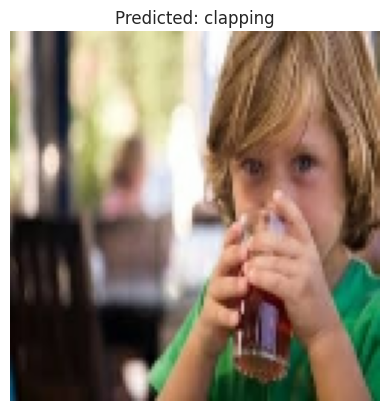

In [66]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load data from CSV
def load_data_from_csv(csv_path, image_dir, label_column='label'):
    data = pd.read_csv(csv_path)
    file_paths = data['filename'].apply(lambda x: os.path.join(image_dir, x)).values
    if label_column in data.columns:
        labels = data[label_column].values
    else:
        labels = None
    return file_paths, labels

# Preprocess function
def preprocess_image(path, label=None):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0
    return image, label

# Prepare tf.data.Dataset
def prepare_dataset(file_paths, labels, img_size, batch_size, validation_split):
    # Encode labels
    if labels is not None:
        label_names = np.unique(labels)
        label_to_index = dict((name, index) for index, name in enumerate(label_names))
        labels = np.vectorize(label_to_index.get)(labels)
    
        # Split data into training and validation
        train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, test_size=validation_split, stratify=labels)
    
        # Create datasets
        train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
        val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
    
        # Apply preprocessing
        train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
        val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    
        
        # Batch and prefetch
        train_dataset = train_dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
        val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
        return train_dataset, val_dataset, len(label_names)
    else:
        # For test dataset
        test_dataset = tf.data.Dataset.from_tensor_slices((file_paths,))
        test_dataset = test_dataset.map(lambda x: preprocess_image(x, None), num_parallel_calls=tf.data.AUTOTUNE)
        test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        return test_dataset

# Build the model
def build_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Callbacks
def get_callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min')
    return [checkpoint, early_stopping]

# Evaluate the model
def evaluate_model(model, test_dataset, label_names):
    Y_pred = model.predict(test_dataset)
    y_pred = np.argmax(Y_pred, axis=1)

    for i, (image, pred) in enumerate(zip(test_dataset.unbatch().take(10), y_pred[:10])):
        plt.figure()
        plt.imshow(image[0].numpy())
        plt.title(f'Predicted: {label_names[pred]}')
        plt.axis('off')
        plt.show()


   # Example usage
if __name__ == "__main__":
    train_dir = '/kaggle/input/hardata/Human Action Recognition/train'
    csv_path = '/kaggle/input/hardata/Human Action Recognition/Training_set.csv'
    test_dir = '/kaggle/input/hardata/Human Action Recognition/test'
    test_csv_path = '/kaggle/input/hardata/Human Action Recognition/Testing_set.csv'  # Assuming the test CSV path
    img_size = (128, 128)
    batch_size = 32
    validation_split = 0.2
    epochs = 60

    file_paths, labels = load_data_from_csv(csv_path, train_dir)
    train_dataset, val_dataset, num_classes = prepare_dataset(file_paths, labels, img_size, batch_size, validation_split)
    
    model = build_model((img_size[0], img_size[1], 3), num_classes)
    callbacks = get_callbacks()
    
    history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, callbacks=callbacks)
    
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



# Prepare test data generator
test_file_paths, _ = load_data_from_csv(test_csv_path, test_dir, label_column=None)  # No labels for test set
test_dataset = prepare_dataset(test_file_paths, None, img_size, batch_size, validation_split)

evaluate_model(model, test_dataset, np.unique(labels))

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


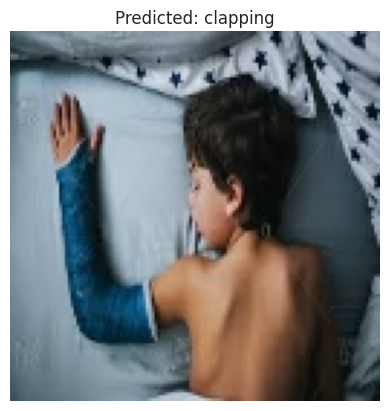

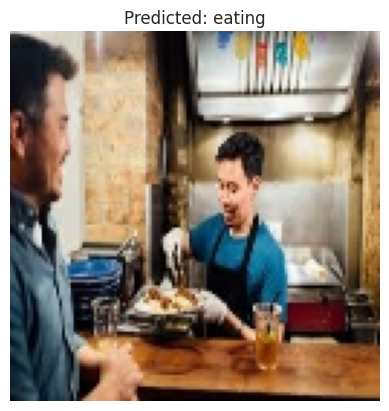

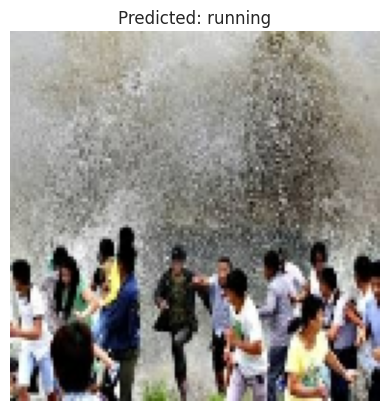

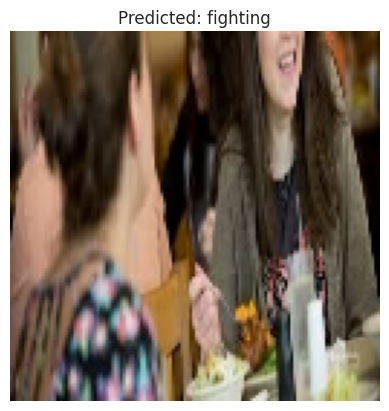

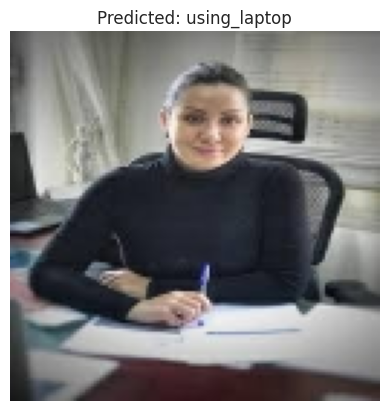

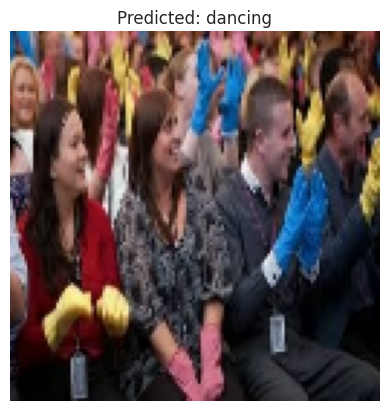

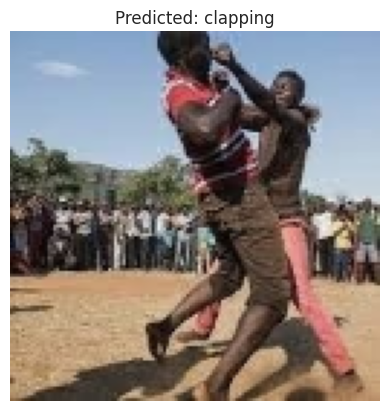

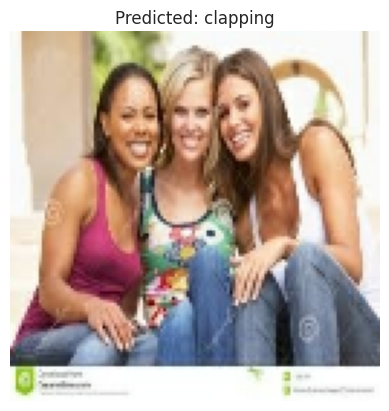

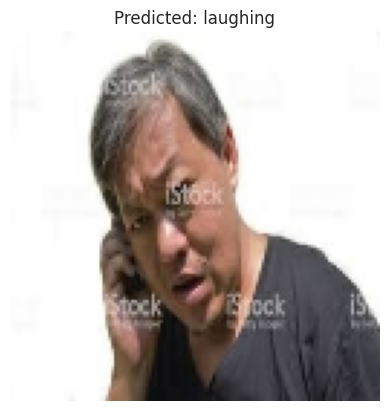

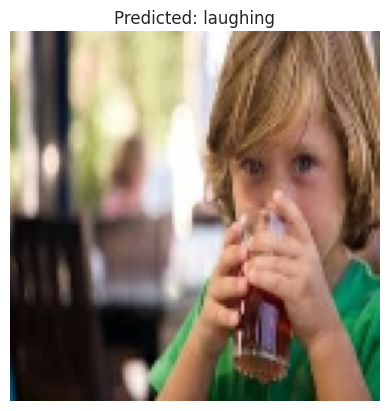

In [44]:
def evaluate_model(model, test_dataset, label_names):
    Y_pred = model.predict(test_dataset)
    y_pred = np.argmax(Y_pred, axis=1)

    for i, (image, pred) in enumerate(zip(test_dataset.unbatch().take(10), y_pred[:10])):
        plt.figure()
        plt.imshow(image[0].numpy())  # Unpack the image from the tuple
        plt.title(f'Predicted: {label_names[pred]}')
        plt.axis('off')
        plt.show()
evaluate_model(model, test_dataset, np.unique(labels))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



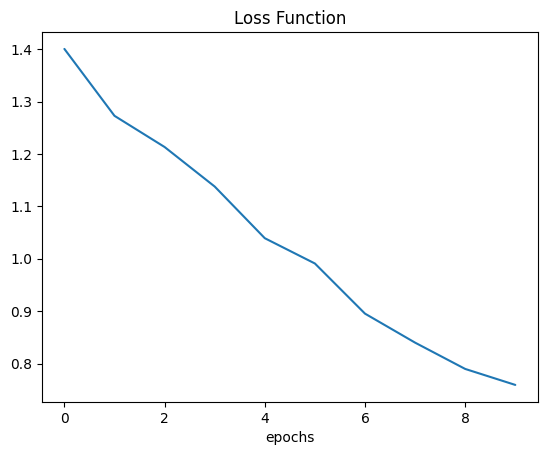

In [70]:
#plotting the loss
loss = history.history['loss']

plt.title("Loss Function")
plt.xlabel("epochs")
sns.set_theme(style='darkgrid')
sns.lineplot(loss);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



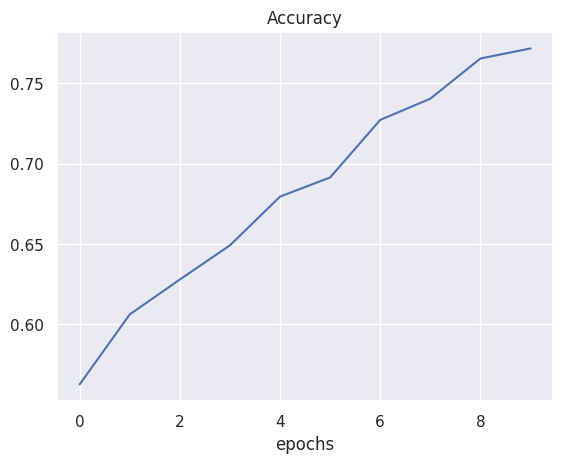

In [71]:
plt.title("Accuracy")
plt.xlabel("epochs")
accu = history.history['accuracy']
sns.lineplot(accu);